# Detección de diabetes utilizando K-NN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

### Recolección del conjunto de datos

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploración y preprocesamiento de los datos

In [3]:
print("Tamaño del dataset")
print("Número de ejemplos: " + str(diabetes.shape[0]))
print("Número de características: " + str(diabetes.shape[1]))

Tamaño del dataset
Número de ejemplos: 768
Número de características: 9


In [4]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


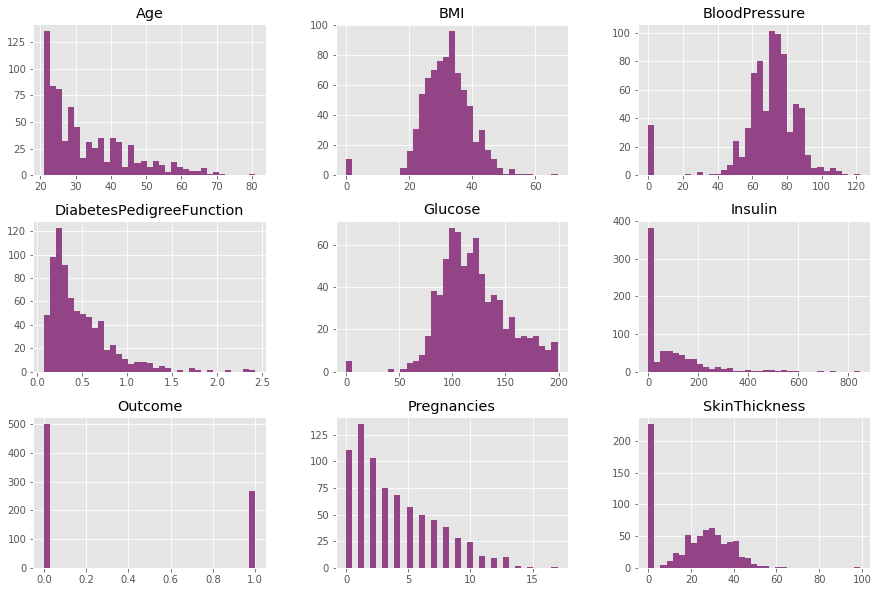

In [6]:
diabetes.hist(bins=35, figsize=(15,10), color='#934487')
plt.show()

In [7]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [30]:
diabetes.head(100)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144.0,72.0,27.0,228.0,33.9,0.255,40,0
96,2,92.0,62.0,28.0,125.0,31.6,0.130,24,0
97,1,71.0,48.0,18.0,76.0,20.4,0.323,22,0
98,6,93.0,50.0,30.0,64.0,28.7,0.356,23,0


In [8]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace = True)

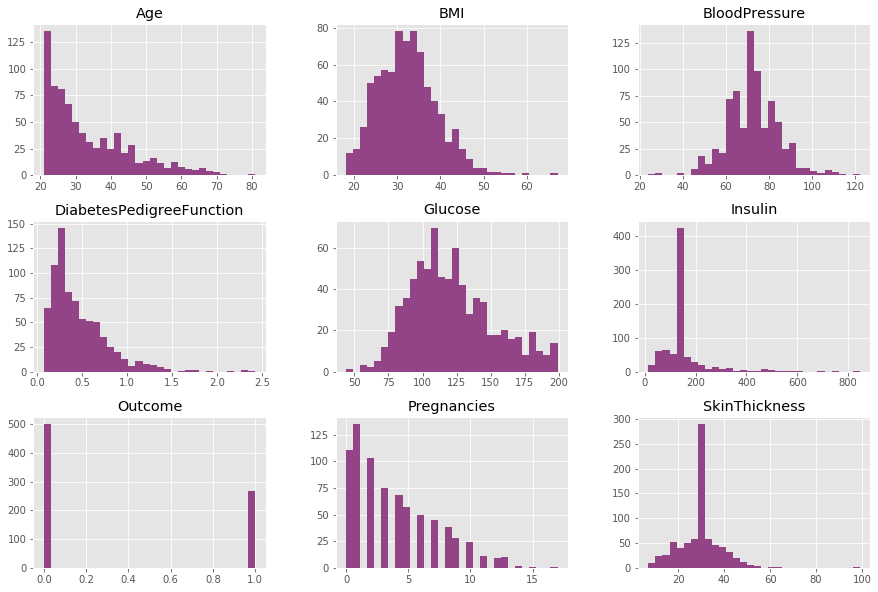

In [9]:
diabetes.hist(bins=30, figsize=(15,10), color='#934487')
plt.show()

In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
diabetes['Outcome'].head(20)



0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: Outcome, dtype: int64

In [11]:
print("Numero de ejemplos positivos y de ejemplos negativos: ")
print(diabetes["Outcome"].value_counts()) 

Numero de ejemplos positivos y de ejemplos negativos: 
0    500
1    268
Name: Outcome, dtype: int64


In [12]:
X = np.asarray(diabetes.iloc[:,0:8])
y = np.asarray(diabetes.Outcome)
print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (768, 8)
y shape: (768,)


In [50]:
print(X[:10])


[[6.00000000e+00 1.48000000e+02 7.20000000e+01 3.50000000e+01
  1.25000000e+02 3.36000000e+01 6.27000000e-01 5.00000000e+01]
 [1.00000000e+00 8.50000000e+01 6.60000000e+01 2.90000000e+01
  1.25000000e+02 2.66000000e+01 3.51000000e-01 3.10000000e+01]
 [8.00000000e+00 1.83000000e+02 6.40000000e+01 2.90000000e+01
  1.25000000e+02 2.33000000e+01 6.72000000e-01 3.20000000e+01]
 [1.00000000e+00 8.90000000e+01 6.60000000e+01 2.30000000e+01
  9.40000000e+01 2.81000000e+01 1.67000000e-01 2.10000000e+01]
 [0.00000000e+00 1.37000000e+02 4.00000000e+01 3.50000000e+01
  1.68000000e+02 4.31000000e+01 2.28800000e+00 3.30000000e+01]
 [5.00000000e+00 1.16000000e+02 7.40000000e+01 2.90000000e+01
  1.25000000e+02 2.56000000e+01 2.01000000e-01 3.00000000e+01]
 [3.00000000e+00 7.80000000e+01 5.00000000e+01 3.20000000e+01
  8.80000000e+01 3.10000000e+01 2.48000000e-01 2.60000000e+01]
 [1.00000000e+01 1.15000000e+02 7.24051842e+01 2.90000000e+01
  1.25000000e+02 3.53000000e+01 1.34000000e-01 2.90000000e+01]


In [47]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [53]:
y_train, y_test

(array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [14]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [15]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))

X_train shape: (614, 8)
X_test shape: (154, 8)


## KNN con reducción dimensional

In [16]:
pca = PCA()
pca_diabetes = pca.fit_transform(X_train)

In [17]:
var_pca = pca.explained_variance_ratio_*100
print(var_pca)

[28.27654825 18.86357455 14.52341072 11.44152968  9.86463681  6.87927815
  5.57923157  4.57179027]


Text(0, 0.5, 'Porcentaje de la varianza %')

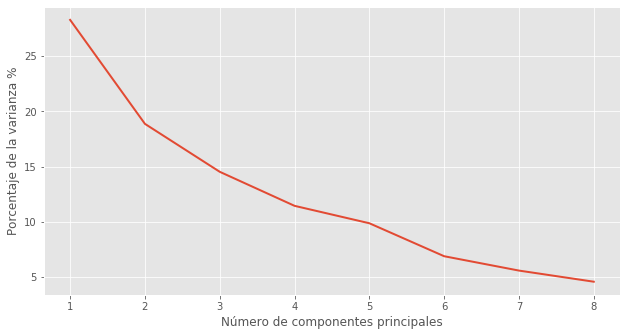

In [19]:
num_cp = list(range(1, len(var_pca) + 1))

fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(num_cp,var_pca,lw=2)
axes.set_xlabel("Número de componentes principales")
axes.set_ylabel("Porcentaje de la varianza %")

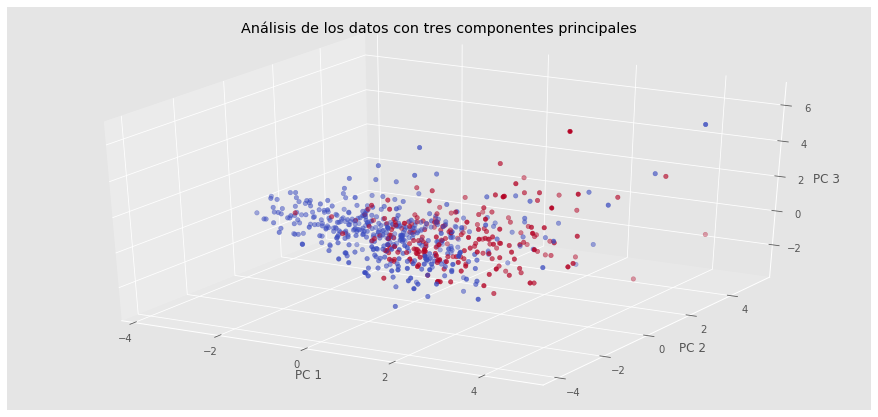

In [20]:
fig = plt.figure(figsize=(15,7))
axes = fig.add_axes([0.1,0.1,0.8,0.8], projection='3d')
axes.scatter(pca_diabetes[:,0],pca_diabetes[:,1],pca_diabetes[:,2], marker='o',c=y_train,
           cmap=plt.cm.coolwarm)
axes.set_title("Análisis de los datos con tres componentes principales")
axes.set_xlabel("PC 1")
axes.set_ylabel("PC 2")
axes.set_zlabel("PC 3")
plt.show()


In [21]:
X_train_PC  = pca_diabetes[:,0:3]
X_train_PC.shape

(614, 3)

In [22]:
X_test_PC = pca.transform(X_test)

In [23]:
X_test_PC = X_test_PC[:,0:3]
X_test_PC.shape

(154, 3)

### Entrenamiento del modelo

In [24]:
knn_PC = KNeighborsClassifier(10)
knn_PC.fit(X_train_PC,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Evaluación del desempeño del modelo

In [25]:
train_accuracy = knn_PC.score(X_train_PC,y_train)
print('Accuracy de los datos de entrenamiento: ' + str(train_accuracy))
test_accuracy = knn_PC.score(X_test_PC,y_test)
print('Accuracy de los datos de prueba: ' + str(test_accuracy))

Accuracy de los datos de entrenamiento: 0.762214983713355
Accuracy de los datos de prueba: 0.7207792207792207


In [26]:
y_pred = knn_PC.predict(X_test_PC)
print('Matriz de confusión')
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))

Matriz de confusión
Predicted   0   1  All
True                  
0          76  23   99
1          20  35   55
All        96  58  154
----------------------------------------------------- 
Metricas de clasificación
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



### Mejorando el modelo

In [27]:
param_grid = {"n_neighbors": np.arange(1, 31)}
knn_gscv = GridSearchCV(knn_PC, param_grid, cv=10,scoring = 'f1')
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
knn_gscv.best_params_

In [ ]:
knn_gscv.best_score_

In [ ]:
knn_PC = KNeighborsClassifier(25)
knn_PC.fit(X_train_PC,y_train)
y_pred = knn_PC.predict(X_test_PC)

print('Matriz de confusión')
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))

## KNN sin reducción dimensional

### Entrenamiento del modelo

In [ ]:
knn = KNeighborsClassifier(25)
knn.fit(X_train,y_train)

### Evaluación del desempeño del modelo

In [ ]:
train_accuracy = knn.score(X_train,y_train)
print('Accuracy de los datos de entrenamiento: ' + str(train_accuracy))
test_accuracy = knn.score(X_test,y_test)
print('Accuracy de los datos de prueba: ' + str(test_accuracy))

In [ ]:
y_pred = knn.predict(X_test)
print('Matriz de confusión')
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))
print("----------------------------------------------------- ")
print('Metricas de clasificación')
print(classification_report(y_test,y_pred))